## Popcorn Hack 1

In [1]:
import pandas as pd


def find_students_in_range(df, min_score, max_score):
    return df[(df['Score'] >= min_score) & (df['Score'] <= max_score)]

student_data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Score': [85, 92, 78, 88]
})

find_students_in_range(student_data, 80, 90)


,Name,Score
0,Alice,85
3,Diana,88


## Popcorn Hack 2

In [2]:
def add_letter_grades(df):
    def get_letter(score):
        if score >= 90:
            return 'A'
        elif score >= 80:
            return 'B'
        elif score >= 70:
            return 'C'
        elif score >= 60:
            return 'D'
        else:
            return 'F'
    
    df['Letter'] = df['Score'].apply(get_letter)
    return df


import pandas as pd

student_data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Score': [85, 92, 78, 59]
})

add_letter_grades(student_data)


,Name,Score,Letter
0,Alice,85,B
1,Bob,92,A
2,Charlie,78,C
3,Diana,59,F


## Popcorn Hack 3

In [3]:
def find_mode(series):
    return series.mode().iloc[0]

import pandas as pd

find_mode(pd.Series([1, 2, 2, 3, 4, 2, 5]))


np.int64(2)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import folium

# Load data
data = pd.read_csv('/home/shawnray/nighthawk/shawnr_2025/datasets/treas_parking_meters_loc_datasd.csv')
data.head()


,zone,area,sub_area,pole,config_id,config_name,date_inventory,lat,lng,sapid
0,Downtown,Core,1000 FIRST AVE,1-1004,49382,Sunday Mode,2021-01-04 00:00:00,32.715904,-117.163929,SS-000031
1,Downtown,Core - Columbia,1000 FIRST AVE,1-1004,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (NFC),2018-11-11 00:00:00,32.715904,-117.163929,SS-000031
2,Downtown,Core,1000 FIRST AVE,1-1006,49382,Sunday Mode,2021-01-04 00:00:00,32.716037,-117.163930,SS-000031
3,Downtown,Core - Columbia,1000 FIRST AVE,1-1006,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (NFC),2018-11-11 00:00:00,32.716037,-117.163930,SS-000031
4,Downtown,Core,1000 FIRST AVE,1-1008,49382,Sunday Mode,2021-01-04 00:00:00,32.716169,-117.163931,SS-000031


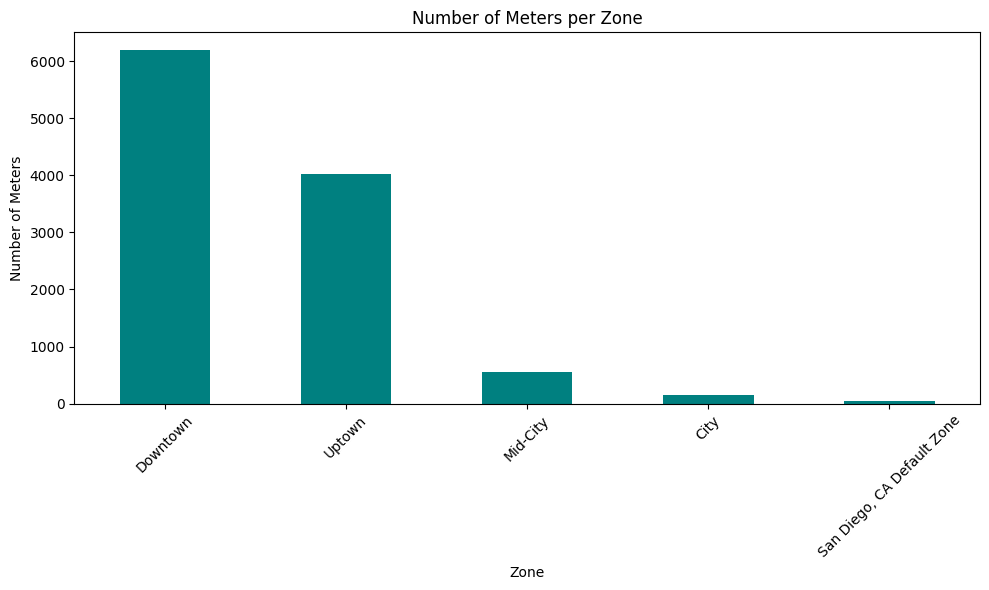

In [8]:
zone_counts = data['zone'].value_counts()

plt.figure(figsize=(10, 6))
zone_counts.plot(kind='bar', color='teal')
plt.title('Number of Meters per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Meters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
<img src="{{site.baseurl}}/images/output3.png" width="900" alt="postmanget">

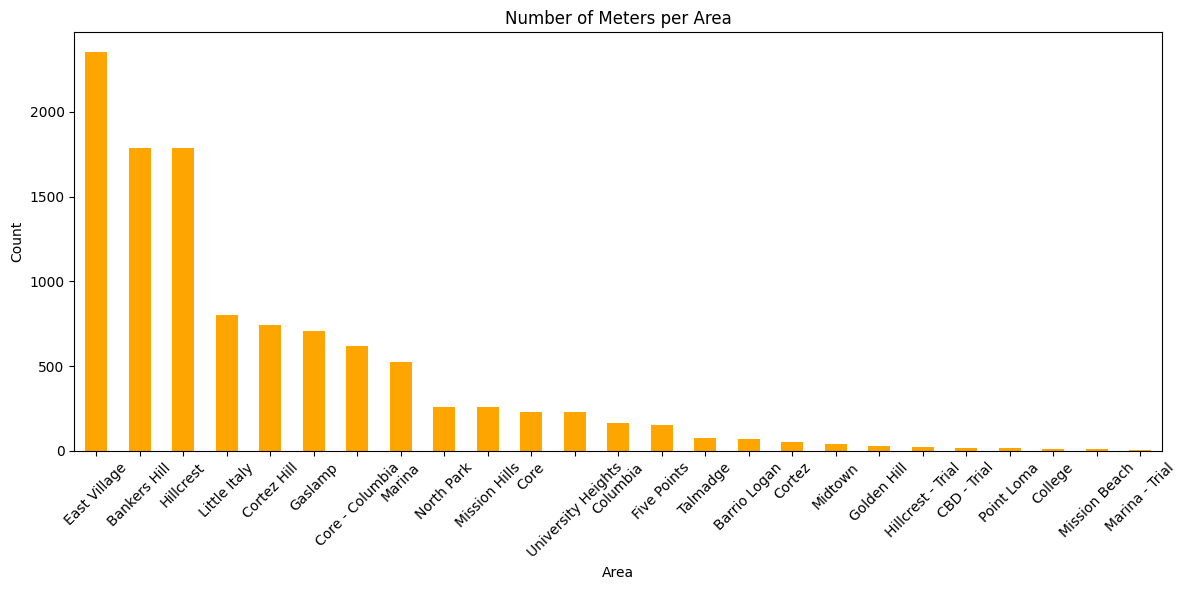

In [9]:
area_counts = data['area'].value_counts().sort_values(ascending=False)
sub_area_counts = data['sub_area'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
area_counts.plot(kind='bar', color='orange')
plt.title('Number of Meters per Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
<img src="{{site.baseurl}}/images/output2.png" width="900" alt="postmanget">

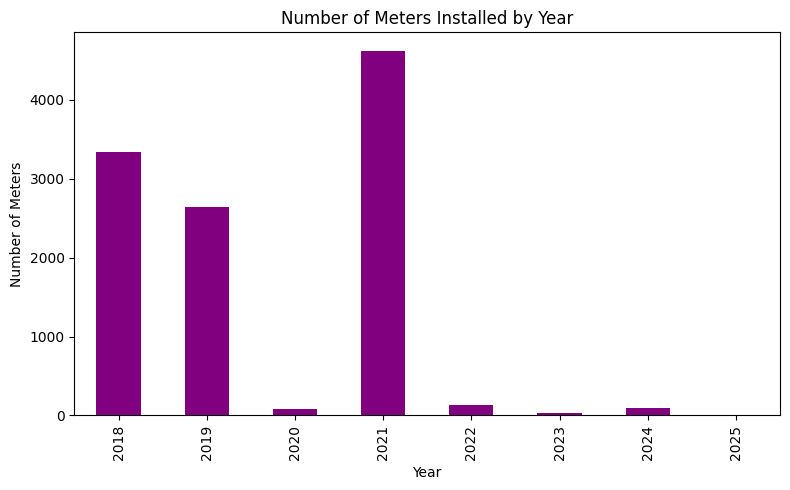

In [10]:
data['date_inventory'] = pd.to_datetime(data['date_inventory'], errors='coerce')
data['inventory_year'] = data['date_inventory'].dt.year

year_counts = data['inventory_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
year_counts.plot(kind='bar', color='purple')
plt.title('Number of Meters Installed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Meters')
plt.tight_layout()
plt.show()


In [ ]:
<img src="{{site.baseurl}}/images/output.png" width="900" alt="postmanget">

/tmp/ipykernel_1014/91221402.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_configs.index, y=top_configs.values, palette='viridis')


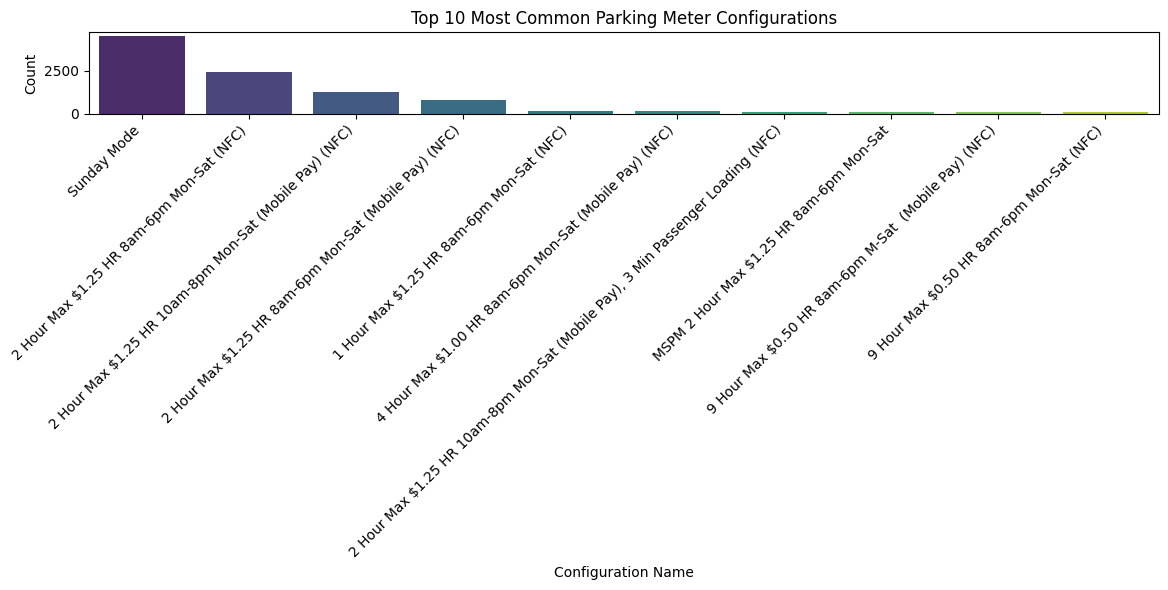

In [18]:
# Top 10 most common configurations
top_configs = data['config_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_configs.index, y=top_configs.values, palette='viridis')

plt.title('Top 10 Most Common Parking Meter Configurations')
plt.xlabel('Configuration Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Tilt the x-axis labels
plt.tight_layout()
plt.show()


In [ ]:
<img src="{{site.baseurl}}/images/output1.png" width="900" alt="postmanget">

In [14]:
map_sd = folium.Map(location=[data['lat'].mean(), data['lng'].mean()], zoom_start=13)

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=2,
        popup=f"Pole: {row['pole']}<br>Zone: {row['zone']}",
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(map_sd)

# Show in Jupyter OR save to HTML
map_sd.save('smartpark_map.html')



In [13]:
conn = sqlite3.connect('smartpark_inventory.db')
data.to_sql('meter_inventory', conn, if_exists='replace', index=False)


10964

In [15]:
query1 = """
SELECT zone, COUNT(*) AS meter_count
FROM meter_inventory
GROUP BY zone
ORDER BY meter_count DESC;
"""
pd.read_sql(query1, conn)


,zone,meter_count
0,Downtown,6196
1,Uptown,4017
2,Mid-City,548
3,City,155
4,"San Diego, CA Default Zone",48


In [16]:
query2 = """
SELECT config_name, MIN(date_inventory) as first_seen, MAX(date_inventory) as last_seen
FROM meter_inventory
GROUP BY config_name;
"""
pd.read_sql(query2, conn)


,config_name,first_seen,last_seen
0,1 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile P...,2018-11-11 00:00:00,2021-03-23 00:00:00
1,1 Hour Max $1.25 HR 8am-4pm Mon-Fri 8am-6pm Sa...,2018-11-11 00:00:00,2018-11-11 00:00:00
2,1 Hour Max $1.25 HR 8am-4pm Mon-Sat (NFC),2018-11-11 00:00:00,2018-11-11 00:00:00
3,"1 Hour Max $1.25 HR 8am-5pm Mon-Sat, No Parkin...",2018-11-11 00:00:00,2018-11-11 00:00:00
4,1 Hour Max $1.25 HR 8am-6pm Mon-Sat (Mobile Pa...,2018-11-11 00:00:00,2020-02-02 00:00:00
...,...,...,...
105,MSPM-PBS 2 Hour Max $1.25 HR 10am-8pm Mon-Sat,2019-12-29 00:00:00,2019-12-29 00:00:00
106,San Diego Default,2018-11-11 00:00:00,2019-12-29 00:00:00
107,Single Space 2 hour meters Petco Special Event...,2019-12-29 00:00:00,2022-09-12 00:00:00
108,Single Space 30 min meters Petco Special Event...,2019-12-29 00:00:00,2019-12-29 00:00:00


### Comparison: SQL vs Pandas

- **Pandas Pros**: Easy chaining, good for rapid prototyping, integrates with plotting libraries.
- **SQL Pros**: Declarative, familiar to database users, better for large structured queries.
- **Pandas Cons**: Can get messy with complex filters or joins.
- **SQL Cons**: Harder to visualize data, more verbose syntax for basic operations.

In this project, Pandas was great for quick aggregation and plotting, while SQL was useful for queries like counting meters per zone or filtering by date.
